## Aquisição e exploração dos dados

- [ ] Levantamento e Exploração de dados relacionados aos casos de Tuberculose no Brasil e no Ceará:
    - [ ] Limpeza dos Dados brutos;
    - [ ] Filtragem dos dados relevantes;
    - [ ] Conversão de dados string para datetime;
    - [ ] Exportar dados processados
- [ ] Levantamento e Exploração de dados relacionados à Vacinação de BCG no Brasil e no Ceará:
    - [ ] Limpeza dos Dados brutos;
    - [ ] Filtragem dos dados relevantes;
    - [ ] Conversão de dados string para datetime.
    - [ ] Exportar dados processados

### Descrição dos dados:

 - [Bases de dados - DATASUS/TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02)
 
 - **casos_tuberculose_ano_uf.csv**: TUBERCULOSE - Casos confirmados notificados no Sistema de Informação de Agravos de Notificação - Brasil. Casos confirmados por UF de notificação e Ano Notificaçã0. Período 2001-2020. [Fonte: DATASUS/TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02).
 - **doses_cv_ano_uf.csv**: Imunizações - Cobertura - Brasil. Doses Cáculos CV por Unidade da Federação e Ano. Período:1994-2019. [Fonte: DATASUS/TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02).
 - **doses_cv_imuno_uf.csv**: Imunizações - Cobertura - Brasil. Doses Cáculos CV por Unidade da Federação e Imuno. Período:1994-2019. [Fonte: DATASUS/TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02).
 - **doses_cv_imuno_uf-2009.csv**: Imunizações - Cobertura - Brasil. Doses Cáculos CV por Unidade da Federação e Imuno. Período:2009. [Fonte: DATASUS/TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02).
 - **doses_cv_imuno_uf-2019.csv**: Imunizações - Cobertura - Brasil. Doses Cáculos CV por Unidade da Federação e Imuno. Período:2019. [Fonte: DATASUS/TABNET](http://www2.datasus.gov.br/DATASUS/index.php?area=02).

In [24]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Importar dados
dados_tuberculose = pd.read_csv("../data/raw/casos_tuberculose_ano_uf.csv",  encoding = "ISO-8859-1",
                   skiprows = 3, sep = ";", skipfooter = 19,
                   thousands = ".", decimal = ",")
dados_tuberculose.head()

<ipython-input-25-17a966508e61>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados_tuberculose = pd.read_csv("../data/raw/casos_tuberculose_ano_uf.csv",  encoding = "ISO-8859-1",


,UF de notificação,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,720,690,660,779,773,693,735,608,16,13116
1,12 Acre,-,-,-,-,-,-,-,-,-,...,394,440,389,436,495,485,591,602,20,8164
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,3066,3127,3401,3284,3688,3777,3943,3537,46,58320
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,167,148,170,162,212,268,323,324,14,3731
4,15 Pará,-,-,-,-,-,-,-,-,-,...,4131,3944,3974,4216,4524,4698,5496,4927,94,83153


In [26]:
# UF para Index

dados_tuberculose = dados_tuberculose.set_index("UF de notificação")

In [27]:
dados_tuberculose.select_dtypes("object")

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1995,1996,1997,1998,1999
UF de notificação,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
17 Tocantins,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
21 Maranhão,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
22 Piauí,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [28]:
# Ocupar células com dados não nulos

dados_tuberculose = dados_tuberculose.replace("-", np.nan)
dados_tuberculose.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
UF de notificação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,720,690,660,779,773,693,735,608,16,13116
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,394,440,389,436,495,485,591,602,20,8164
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3066,3127,3401,3284,3688,3777,3943,3537,46,58320
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,167,148,170,162,212,268,323,324,14,3731
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4131,3944,3974,4216,4524,4698,5496,4927,94,83153


In [29]:
# Checagem de dados:
dados_tuberculose.T.info()
#dados_tuberculose["1999"]

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1980 to Total
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   11 Rondônia             22 non-null     object
 1   12 Acre                 22 non-null     object
 2   13 Amazonas             22 non-null     object
 3   14 Roraima              22 non-null     object
 4   15 Pará                 22 non-null     object
 5   16 Amapá                22 non-null     object
 6   17 Tocantins            22 non-null     object
 7   21 Maranhão             22 non-null     object
 8   22 Piauí                22 non-null     object
 9   23 Ceará                22 non-null     object
 10  24 Rio Grande do Norte  22 non-null     object
 11  25 Paraíba              22 non-null     object
 12  26 Pernambuco           22 non-null     object
 13  27 Alagoas              22 non-null     object
 14  28 Sergipe              22 non-null     object
 15  29 Bahi

In [30]:
dados_tuberculose.isnull().sum().sum()

494

In [44]:
# Converter dados de "object" para "float64"

dados_tuberculose = dados_tuberculose.astype("float64")
dados_tuberculose

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
UF de notificação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,720.0,690.0,660.0,779.0,773.0,693.0,735.0,608.0,16.0,13116.0
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,394.0,440.0,389.0,436.0,495.0,485.0,591.0,602.0,20.0,8164.0
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3066.0,3127.0,3401.0,3284.0,3688.0,3777.0,3943.0,3537.0,46.0,58320.0
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,167.0,148.0,170.0,162.0,212.0,268.0,323.0,324.0,14.0,3731.0
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4131.0,3944.0,3974.0,4216.0,4524.0,4698.0,5496.0,4927.0,94.0,83153.0
16 Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,220.0,210.0,223.0,284.0,294.0,268.0,355.0,319.0,7.0,5287.0
17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,190.0,193.0,190.0,208.0,182.0,226.0,234.0,205.0,9.0,4612.0
21 Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2316.0,2081.0,2277.0,2412.0,2502.0,2654.0,2705.0,2498.0,73.0,52125.0
22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,903.0,815.0,773.0,794.0,799.0,875.0,862.0,779.0,27.0,22137.0


In [45]:
dados_tuberculose.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 1980 to Total
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   11 Rondônia             22 non-null     float64
 1   12 Acre                 22 non-null     float64
 2   13 Amazonas             22 non-null     float64
 3   14 Roraima              22 non-null     float64
 4   15 Pará                 22 non-null     float64
 5   16 Amapá                22 non-null     float64
 6   17 Tocantins            22 non-null     float64
 7   21 Maranhão             22 non-null     float64
 8   22 Piauí                22 non-null     float64
 9   23 Ceará                22 non-null     float64
 10  24 Rio Grande do Norte  22 non-null     float64
 11  25 Paraíba              22 non-null     float64
 12  26 Pernambuco           22 non-null     float64
 13  27 Alagoas              22 non-null     float64
 14  28 Sergipe              22 non-null     flo

In [60]:
dados_tuberculose.columns
dados_tuberculose = dados_tuberculose.drop("Total", axis = 1)
dados_tuberculose.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
UF de notificação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,694.0,720.0,690.0,660.0,779.0,773.0,693.0,735.0,608.0,16.0
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,414.0,394.0,440.0,389.0,436.0,495.0,485.0,591.0,602.0,20.0
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2830.0,3066.0,3127.0,3401.0,3284.0,3688.0,3777.0,3943.0,3537.0,46.0
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141.0,167.0,148.0,170.0,162.0,212.0,268.0,323.0,324.0,14.0
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4040.0,4131.0,3944.0,3974.0,4216.0,4524.0,4698.0,5496.0,4927.0,94.0


<AxesSubplot:>

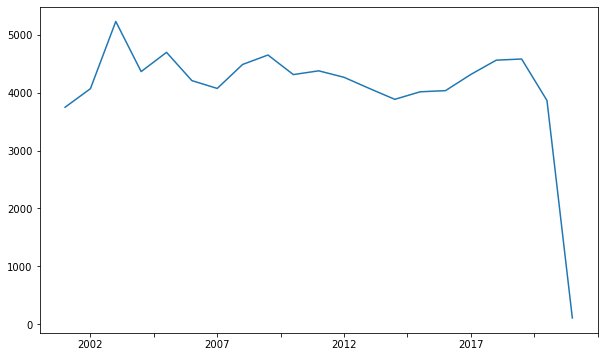

In [68]:
dados_tuberculose.loc['23 Ceará'].plot(figsize=(10, 6))